#### Importacion de librerias 

In [2]:
import random
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy.stats import truncnorm

# Selección de Dataset

##### https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

#### Leyendo el dataset

In [3]:
df = pd.read_csv('StudentsPerformance.csv')

In [4]:
df.head(5)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Cantidad de registros

In [6]:
df.shape[0]

1000

#### Explicacion de columnas


####
  gender → Género del estudiante (male o female).
####
 race → Grupo étnico al que pertenece el estudiante (group A, group B, etc.).
####
 parental_level_of_education → Nivel educativo más alto alcanzado por los padres (some college, bachelor's degree, etc.).
####
 lunch → Tipo de almuerzo que recibe el estudiante (standard o free/reduced).
####
 test_preparation_course → Si el estudiante completó un curso de preparación para los exámenes (none o completed).
####
 math_score → Puntuación obtenida en el examen de matemáticas (escala de 0 a 100).
####
 reading_score → Puntuación obtenida en el examen de lectura (escala de 0 a 100).
####
 writing_score → Puntuación obtenida en el examen de escritura (escala de 0 a 100).
####
 GPA → Promedio general del estudiante convertido a una escala de 4.0.

##### Analizando tipos de datos en las columnas

In [7]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

#### Generando una nueva columna GPA(Grade Point Average) a partir de las notas del df, para hacer un analisas mas completo

In [8]:
df["GPA"] = df[["math score", "reading score", "writing score"]].mean(axis=1) * (4 / 100)

In [9]:
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,female,group B,bachelor's degree,standard,none,72,72,74,2.906667
1,female,group C,some college,standard,completed,69,90,88,3.293333
2,female,group B,master's degree,standard,none,90,95,93,3.706667


In [10]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'GPA'],
      dtype='object')

##### Limpiando nombres de columnas

In [11]:
df.columns = ['gender', 'race', 'parental_level_of_education', 'lunch',
        'test_preparation_course', 'math_score', 'reading_score',
        'writing_score', 'GPA']

#### Columnas con su tipo de dato

In [12]:
df.dtypes

gender                          object
race                            object
parental_level_of_education     object
lunch                           object
test_preparation_course         object
math_score                       int64
reading_score                    int64
writing_score                    int64
GPA                            float64
dtype: object

#### columnas categoricas

In [13]:
cat_cols = []

for c in df.columns:
    if df[c].dtype == 'O':
        cat_cols.append(c)


In [14]:
cat_cols

['gender',
 'race',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

#### columnas numericas

In [15]:
num_cols = []

for c in df.columns:
    if df[c].dtype == 'int64' or df[c].dtype == 'float64': 
        num_cols.append(c)


In [16]:
num_cols

['math_score', 'reading_score', 'writing_score', 'GPA']

#### Descripcion de datos numericos

In [17]:
df.describe()

,math_score,reading_score,writing_score,GPA
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,2.710827
std,15.16308,14.600192,15.195657,0.570293
min,0.00000,17.000000,10.000000,0.360000
25%,57.00000,59.000000,57.750000,2.333333
50%,66.00000,70.000000,69.000000,2.733333
75%,77.00000,79.000000,79.000000,3.106667
max,100.00000,100.000000,100.000000,4.000000


#### Histograma de las variables numericas 

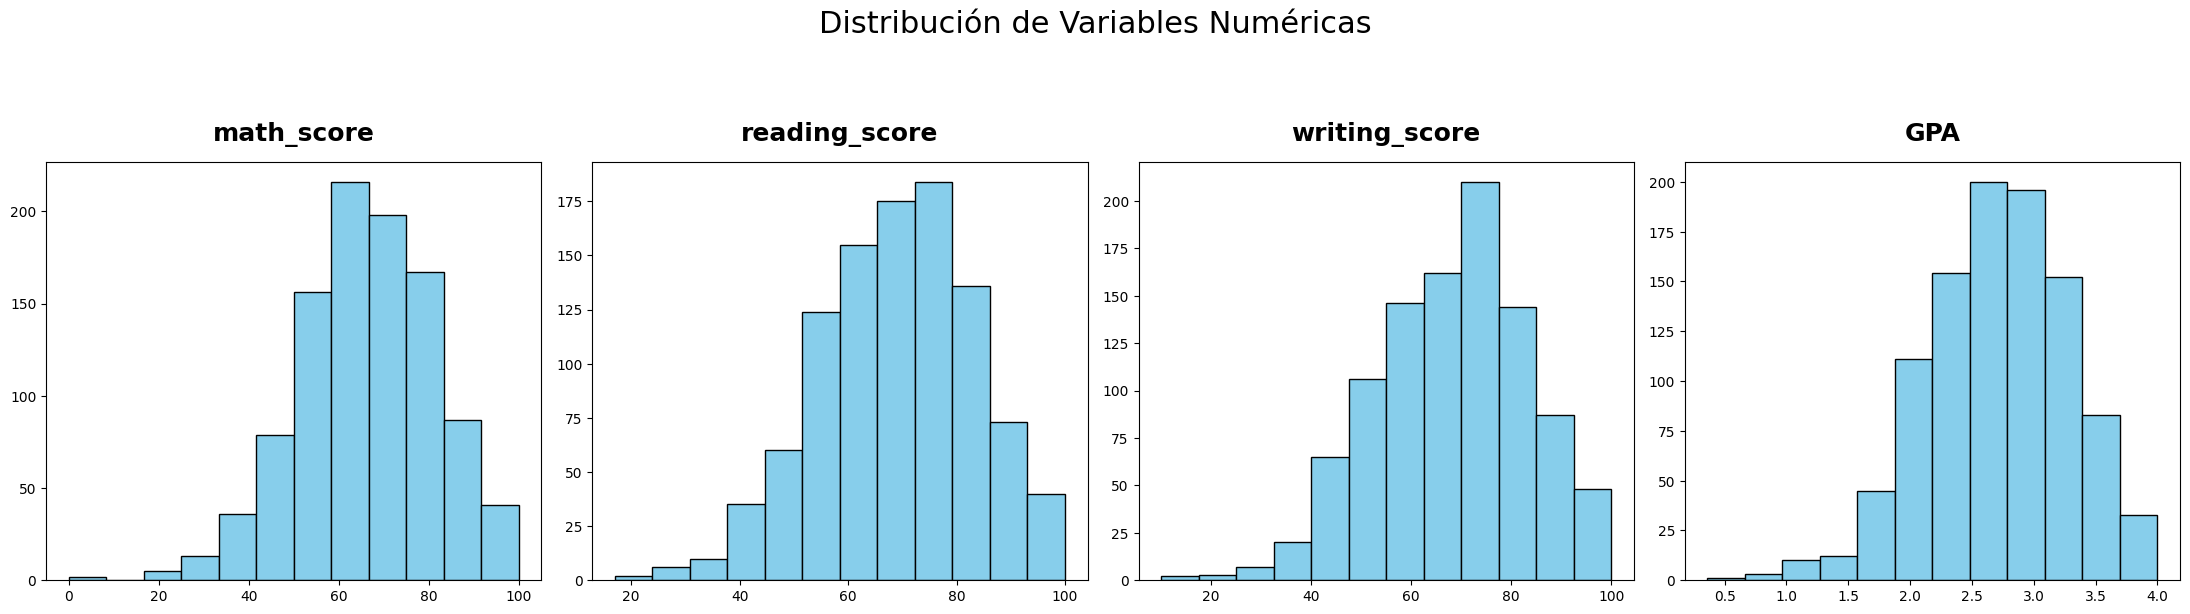

In [18]:
import matplotlib.pyplot as plt

axes = df[num_cols].hist(
    figsize=(22, 19), bins=12, edgecolor='black', layout=(4, 4), grid=False, color='skyblue'
)

for ax in axes.flatten():
    ax.set_title(ax.get_title(), fontsize=18,y = 1.03, fontweight='bold') 
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)  # Ajusta tamaño del label en X
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)  # Ajusta tamaño del label en Y

plt.suptitle('Distribución de Variables Numéricas', fontsize=22, y=1.03)

plt.tight_layout()
plt.show()


### Distribuciones de las categorías principales

In [19]:
distribuciones = df.groupby( cat_cols , as_index=False ).agg({
    "GPA": ["count"]
})

distribuciones.columns = cat_cols + ["count"]

In [20]:
distribuciones

,gender,race,parental_level_of_education,lunch,test_preparation_course,count
0,female,group A,associate's degree,free/reduced,none,3
1,female,group A,associate's degree,standard,completed,2
2,female,group A,associate's degree,standard,none,1
3,female,group A,bachelor's degree,standard,none,3
4,female,group A,high school,free/reduced,completed,3
...,...,...,...,...,...,...
206,male,group E,some college,standard,completed,4
207,male,group E,some college,standard,none,12
208,male,group E,some high school,free/reduced,completed,2
209,male,group E,some high school,standard,completed,6


##### Correlaciones entre variables

In [21]:
df[num_cols].corr()

,math_score,reading_score,writing_score,GPA
math_score,1.000000,0.817580,0.802642,0.918746
reading_score,0.817580,1.000000,0.954598,0.970331
writing_score,0.802642,0.954598,1.000000,0.965667
GPA,0.918746,0.970331,0.965667,1.000000


##### Comenzando la Simulación del dataset

##### Revisando datos atipicos 